<a href="https://colab.research.google.com/github/Adn02/Intro-to-ML/blob/main/Homework/HW5/HW5Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import matplotlib.pyplot as plt
import torch.optim as optim
import torch

# **Pre-processing**


> **Separating desired Features and Outputs**


In [27]:
x = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]      # Y
y = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]  # X

t_c = torch.tensor(y)
t_u = torch.tensor(x)


> **Splitting Training and Validation Set**


In [28]:
samples = t_u.shape[0]
values = int(0.2 * samples)

shuffle = torch.randperm(samples)
train_idx = shuffle[:-values]
valid_idx = shuffle[-values:]

t_u_train = t_u[train_idx]
t_u_valid = t_u[valid_idx]

t_c_train = t_c[train_idx]
t_c_valid = t_c[valid_idx]

t_un_train = 0.1 * t_u_train
t_un_valid = 0.1 * t_u_valid

# **Training**



> **Linear Regression Training**




In [29]:
def lin_model(t_u, w, b):
  return w*t_u + b

def lin_training(epochs, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid):
  for epoch in range(1, epochs+1):
    t_p_train = lin_model(t_u_train, *params)
    train_loss = cost(t_p_train, t_c_train)

    t_p_valid = lin_model(t_u_valid, *params)
    valid_loss = cost(t_p_valid, t_c_valid)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {valid_loss:.6f}')
  return params



> **Non-linear Regression Training**




In [30]:
def nonlin_model(t_u, w2, w1, b):
  return w2*t_u**2 + w1*t_u + b

def cost(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

def nonlin_training(epochs, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid):
  for epoch in range(1, epochs+1):
    t_p_train = nonlin_model(t_u_train, *params)
    train_loss = cost(t_p_train, t_c_train)

    t_p_valid = nonlin_model(t_u_valid, *params)
    valid_loss = cost(t_p_valid, t_c_valid)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:}, \tValidation Loss: {valid_loss}')
  return params

# **SGD Optimized Linear Model**

> *Trained with LR of* ***1e-1***

In [31]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-1)

print('Learning rate of 0.1')
nonlin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)

Learning rate of 0.1
Epochs: 500, 	Training Loss: 7.671742, 	Validation Loss: 33.196323
Epochs: 1000, 	Training Loss: 7.656001, 	Validation Loss: 38.149887
Epochs: 1500, 	Training Loss: 7.655884, 	Validation Loss: 38.607559
Epochs: 2000, 	Training Loss: 7.655883, 	Validation Loss: 38.647118
Epochs: 2500, 	Training Loss: 7.655886, 	Validation Loss: 38.649368
Epochs: 3000, 	Training Loss: 7.655886, 	Validation Loss: 38.649368
Epochs: 3500, 	Training Loss: 7.655886, 	Validation Loss: 38.649368
Epochs: 4000, 	Training Loss: 7.655886, 	Validation Loss: 38.649368
Epochs: 4500, 	Training Loss: 7.655886, 	Validation Loss: 38.649368
Epochs: 5000, 	Training Loss: 7.655886, 	Validation Loss: 38.649368



tensor([-3.1850, 23.4692, 32.3919], requires_grad=True)

> *Trained with LR of* ***1e-2***

In [32]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-2)

print('Learning rate of 0.01')
nonlin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)

Learning rate of 0.01
Epochs: 500, 	Training Loss: 9.087526, 	Validation Loss: 17.566803
Epochs: 1000, 	Training Loss: 8.462468, 	Validation Loss: 19.112978
Epochs: 1500, 	Training Loss: 8.149570, 	Validation Loss: 19.588047
Epochs: 2000, 	Training Loss: 7.958066, 	Validation Loss: 21.379097
Epochs: 2500, 	Training Loss: 7.840847, 	Validation Loss: 23.694225
Epochs: 3000, 	Training Loss: 7.769098, 	Validation Loss: 26.065481
Epochs: 3500, 	Training Loss: 7.725186, 	Validation Loss: 28.263466
Epochs: 4000, 	Training Loss: 7.698300, 	Validation Loss: 30.193024
Epochs: 4500, 	Training Loss: 7.681849, 	Validation Loss: 31.830978
Epochs: 5000, 	Training Loss: 7.671783, 	Validation Loss: 33.190887



tensor([-2.8832, 22.7802, 32.6764], requires_grad=True)

> *Trained with LR of* ***1e-3***

In [33]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-3)

print('Learning rate of 0.001')
nonlin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)

Learning rate of 0.001
Epochs: 500, 	Training Loss: 213.142410, 	Validation Loss: 1405.109985
Epochs: 1000, 	Training Loss: 98.293274, 	Validation Loss: 600.039185
Epochs: 1500, 	Training Loss: 48.179676, 	Validation Loss: 249.094360
Epochs: 2000, 	Training Loss: 26.282156, 	Validation Loss: 104.128716
Epochs: 2500, 	Training Loss: 16.689045, 	Validation Loss: 46.376690
Epochs: 3000, 	Training Loss: 12.462876, 	Validation Loss: 24.845919
Epochs: 3500, 	Training Loss: 10.578659, 	Validation Loss: 17.870245
Epochs: 4000, 	Training Loss: 9.717556, 	Validation Loss: 16.397945
Epochs: 4500, 	Training Loss: 9.304405, 	Validation Loss: 16.755419
Epochs: 5000, 	Training Loss: 9.088370, 	Validation Loss: 17.528862



tensor([-0.1867, 17.1139, 34.5248], requires_grad=True)

> *Trained with LR of* ***1e-4***

In [34]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-4)

print('Learning rate of 0.0001')
nonlin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)

Learning rate of 0.0001
Epochs: 500, 	Training Loss: 1099.033691, 	Validation Loss: 217.989456
Epochs: 1000, 	Training Loss: 617.492310, 	Validation Loss: 448.513794
Epochs: 1500, 	Training Loss: 441.717407, 	Validation Loss: 1039.463867
Epochs: 2000, 	Training Loss: 366.216553, 	Validation Loss: 1454.823364
Epochs: 2500, 	Training Loss: 324.563263, 	Validation Loss: 1659.147827
Epochs: 3000, 	Training Loss: 295.206818, 	Validation Loss: 1715.516235
Epochs: 3500, 	Training Loss: 271.084381, 	Validation Loss: 1684.537231
Epochs: 4000, 	Training Loss: 249.817200, 	Validation Loss: 1607.386108
Epochs: 4500, 	Training Loss: 230.544296, 	Validation Loss: 1508.826660
Epochs: 5000, 	Training Loss: 212.902603, 	Validation Loss: 1402.843018



tensor([10.6444, 12.2568, 16.3887], requires_grad=True)

# **Adam Optimized Linear Model**

> *Trained with LR of* ***1e-1***

In [35]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-1)

print('Learning rate of 0.1')
nonlin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)

Learning rate of 0.1
Epochs: 500, 	Training Loss: 39.121788, 	Validation Loss: 693.821411
Epochs: 1000, 	Training Loss: 18.315025, 	Validation Loss: 369.643341
Epochs: 1500, 	Training Loss: 9.869279, 	Validation Loss: 134.255051
Epochs: 2000, 	Training Loss: 7.905292, 	Validation Loss: 60.438606
Epochs: 2500, 	Training Loss: 7.669092, 	Validation Loss: 42.742485
Epochs: 3000, 	Training Loss: 7.656155, 	Validation Loss: 39.200283
Epochs: 3500, 	Training Loss: 7.655886, 	Validation Loss: 38.692837
Epochs: 4000, 	Training Loss: 7.655885, 	Validation Loss: 38.652603
Epochs: 4500, 	Training Loss: 7.655881, 	Validation Loss: 38.652588
Epochs: 5000, 	Training Loss: 7.655885, 	Validation Loss: 38.652035



tensor([-3.1851e-02,  2.3470e+00,  3.2392e+01], requires_grad=True)

> *Trained with LR of* ***1e-2***

In [36]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-2)

print('Learning rate of 0.01')
nonlin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)

Learning rate of 0.01
Epochs: 500, 	Training Loss: 650.522888, 	Validation Loss: 3573.849854
Epochs: 1000, 	Training Loss: 404.699432, 	Validation Loss: 1769.428345
Epochs: 1500, 	Training Loss: 221.609467, 	Validation Loss: 688.049438
Epochs: 2000, 	Training Loss: 115.815536, 	Validation Loss: 372.220245
Epochs: 2500, 	Training Loss: 67.367706, 	Validation Loss: 491.828766
Epochs: 3000, 	Training Loss: 48.737801, 	Validation Loss: 684.195312
Epochs: 3500, 	Training Loss: 40.540676, 	Validation Loss: 759.658936
Epochs: 4000, 	Training Loss: 34.480453, 	Validation Loss: 709.154907
Epochs: 4500, 	Training Loss: 28.638893, 	Validation Loss: 594.456604
Epochs: 5000, 	Training Loss: 23.063032, 	Validation Loss: 465.036469



tensor([-0.1077,  4.2849, 22.1583], requires_grad=True)

> *Trained with LR of* ***1e-3***

In [37]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-3)

print('Learning rate of 0.01')
nonlin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)

Learning rate of 0.01
Epochs: 500, 	Training Loss: 6178.952148, 	Validation Loss: 75720.898438
Epochs: 1000, 	Training Loss: 1391.339600, 	Validation Loss: 18578.496094
Epochs: 1500, 	Training Loss: 831.342041, 	Validation Loss: 6783.752930
Epochs: 2000, 	Training Loss: 783.777588, 	Validation Loss: 4804.610352
Epochs: 2500, 	Training Loss: 752.728149, 	Validation Loss: 4376.656250
Epochs: 3000, 	Training Loss: 717.241638, 	Validation Loss: 4075.863281
Epochs: 3500, 	Training Loss: 677.316040, 	Validation Loss: 3745.353760
Epochs: 4000, 	Training Loss: 633.284851, 	Validation Loss: 3381.560303
Epochs: 4500, 	Training Loss: 585.705811, 	Validation Loss: 2992.129883
Epochs: 5000, 	Training Loss: 535.459045, 	Validation Loss: 2589.082031



tensor([0.1367, 1.4438, 2.5125], requires_grad=True)

> *Trained with LR of* ***1e-4***

In [38]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-4)

print('Learning rate of 0.01')
nonlin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)

Learning rate of 0.01
Epochs: 500, 	Training Loss: 22966.373047, 	Validation Loss: 238178.062500
Epochs: 1000, 	Training Loss: 20151.880859, 	Validation Loss: 212074.671875
Epochs: 1500, 	Training Loss: 17593.783203, 	Validation Loss: 188099.687500
Epochs: 2000, 	Training Loss: 15270.564453, 	Validation Loss: 166071.468750
Epochs: 2500, 	Training Loss: 13164.777344, 	Validation Loss: 145842.968750
Epochs: 3000, 	Training Loss: 11262.291992, 	Validation Loss: 127296.289062
Epochs: 3500, 	Training Loss: 9551.613281, 	Validation Loss: 110336.882812
Epochs: 4000, 	Training Loss: 8023.200684, 	Validation Loss: 94888.460938
Epochs: 4500, 	Training Loss: 6668.897461, 	Validation Loss: 80888.195312
Epochs: 5000, 	Training Loss: 5481.304688, 	Validation Loss: 68281.937500



tensor([ 0.5559,  0.5601, -0.4257], requires_grad=True)

# **Plotting SGD Optimized Linear vs Nonlinear Models**


Epochs: 500, 	Training Loss: 213.142410, 	Validation Loss: 1405.109985
Epochs: 1000, 	Training Loss: 98.293274, 	Validation Loss: 600.039185
Epochs: 1500, 	Training Loss: 48.179676, 	Validation Loss: 249.094360
Epochs: 2000, 	Training Loss: 26.282156, 	Validation Loss: 104.128716
Epochs: 2500, 	Training Loss: 16.689045, 	Validation Loss: 46.376690
Epochs: 3000, 	Training Loss: 12.462876, 	Validation Loss: 24.845919
Epochs: 3500, 	Training Loss: 10.578659, 	Validation Loss: 17.870245
Epochs: 4000, 	Training Loss: 9.717556, 	Validation Loss: 16.397945
Epochs: 4500, 	Training Loss: 9.304405, 	Validation Loss: 16.755419
Epochs: 5000, 	Training Loss: 9.088370, 	Validation Loss: 17.528862



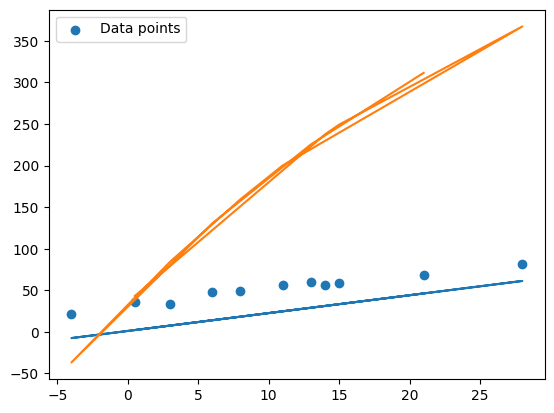

In [39]:
lin_params = torch.tensor([1.0, 0.0], requires_grad=True)
nonlin_params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

lin_optimizer = optim.SGD([lin_params], lr = 1e-2)
nonlin_optimizer = optim.SGD([nonlin_params], lr = 1e-3)

lin = lin_training(5000, lin_optimizer, lin_params, t_un_train, t_un_valid, t_c_train, t_c_valid)
non = nonlin_training(5000, nonlin_optimizer, nonlin_params, t_un_train, t_un_valid, t_c_train, t_c_valid)

t_p_lin = lin_model(t_u, *lin).detach().numpy()
t_p_non = nonlin_model(t_u, *non).detach().numpy()

plt.scatter(t_u, t_c, label = 'Data points')
plt.plot(t_u, t_p_lin)
plt.plot(t_u, t_p_non)

plt.legend()
plt.show()